<a href="https://colab.research.google.com/github/peter-kiilu/python_course/blob/main/Global_Terrorism_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d START-UMD/gtd

Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
100% 28.7M/28.7M [00:00<00:00, 108MB/s] 
100% 28.7M/28.7M [00:00<00:00, 98.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtd.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
data='/content/globalterrorismdb_0718dist.csv'

In [ ]:
import pandas as pd

# Try different encodings until one works
encodings_to_try = ['utf-8', 'ISO-8859-1', 'utf-16', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding=encoding)
        # If no error occurred, break out of the loop
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using {encoding} encoding. Trying the next one...")

Failed to decode using utf-8 encoding. Trying the next one...


In [ ]:
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,181691.0,2.002705e+11,1.325957e+09,1.970000e+11,1.991021e+11,2.009022e+11,2.014081e+11,2.017123e+11
Year,181691.0,2.002639e+03,1.325943e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
Month,181691.0,6.467277e+00,3.388303e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
Day,181691.0,1.550564e+01,8.814045e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
extended,181691.0,4.534622e-02,2.080629e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...
nreleased,10400.0,-2.901827e+01,6.572012e+01,-9.900000e+01,-9.900000e+01,0.000000e+00,1.000000e+00,2.769000e+03
INT_LOG,181691.0,-4.543731e+00,4.543547e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_IDEO,181691.0,-4.464398e+00,4.637152e+00,-9.000000e+00,-9.000000e+00,-9.000000e+00,0.000000e+00,1.000000e+00
INT_MISC,181691.0,9.000996e-02,5.684573e-01,-9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
# Checking for null values
df.isnull().sum()

,0
eventid,0
Year,0
Month,0
Day,0
approxdate,172452
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


In [ ]:
#analyzing datatypes od columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

77

In [ ]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

,0
gsubname3,181671
weapsubtype4_txt,181621
weapsubtype4,181621
weaptype4,181618
weaptype4_txt,181618
...,...
suicide,0
success,0
crit3,0
property,0


In [ ]:
# Renaming columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [ ]:
df

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


<Axes: >

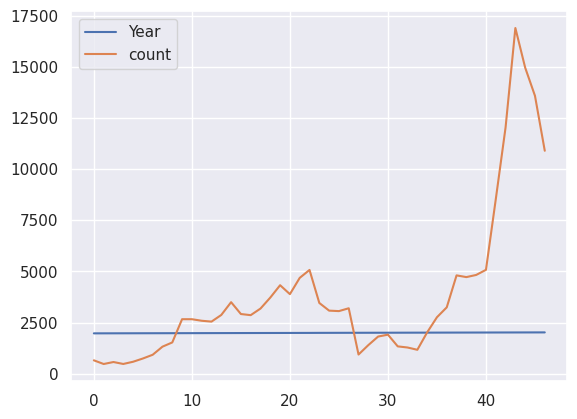

In [ ]:
year_attacks = df.groupby('Year').size().reset_index(name='count')
year_attacks.plot()

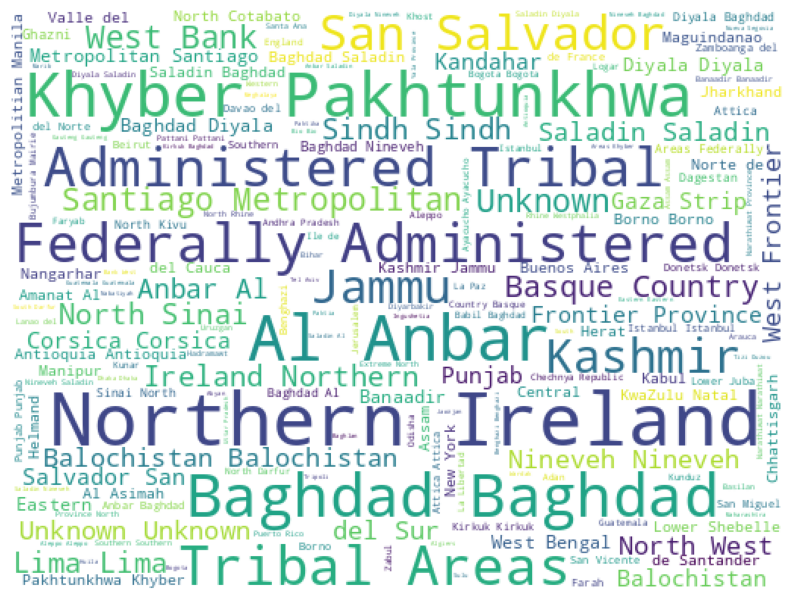

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = df.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

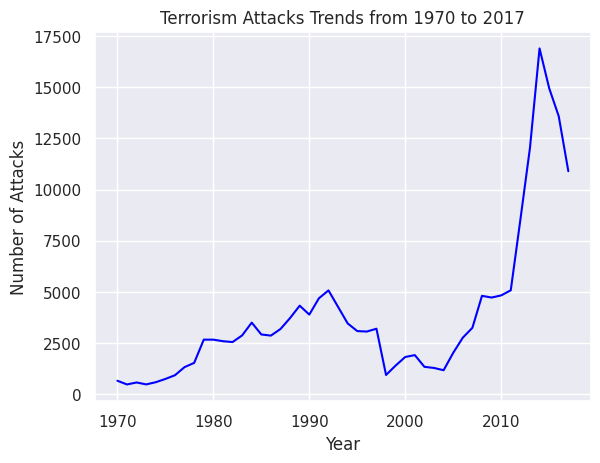

In [ ]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

<Axes: xlabel='Month'>

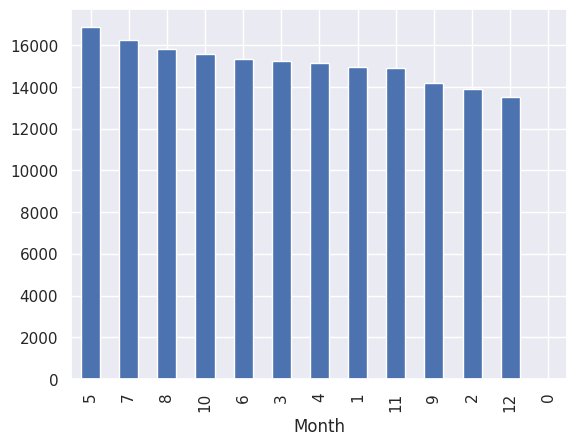

In [ ]:
df['Month'].value_counts().plot(kind='bar')

<Axes: xlabel='Country'>

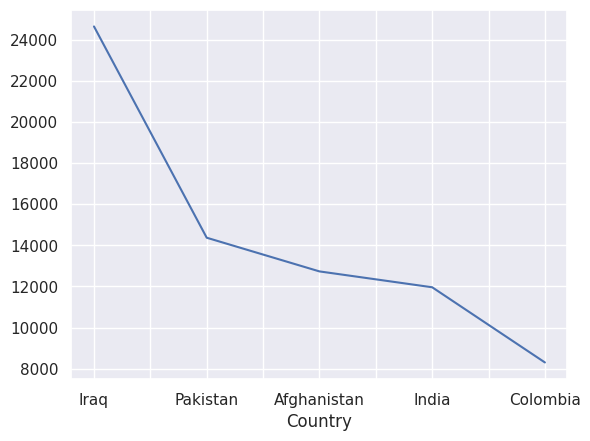

In [ ]:
df['Country'].value_counts().head().plot(kind='line')

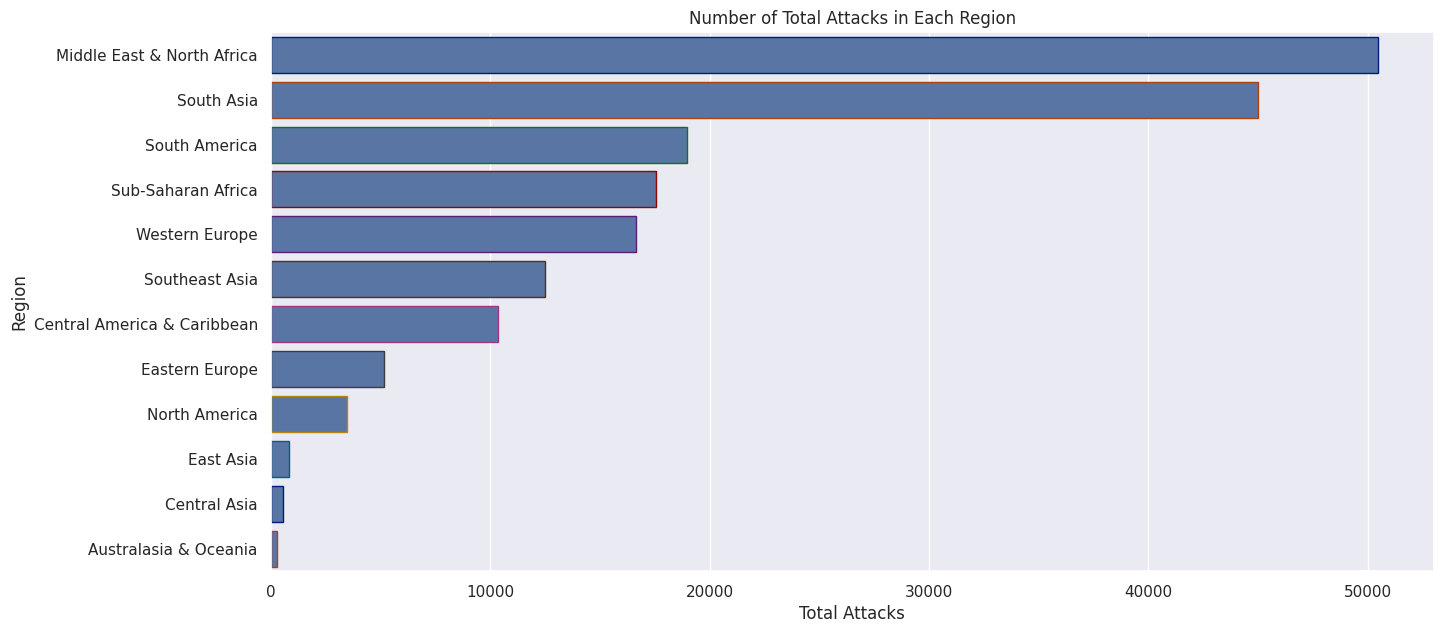

In [ ]:
region_attacks= df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

In [ ]:
k=df[["Year","Killed"]].groupby("Year").sum()
k.tail()

,Killed
Year,
2013,22273.0
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0


In [ ]:
w=df[["Year","Wounded"]].groupby("Year").sum()
w.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


Text(0, 0.5, 'Number of People Wounded')

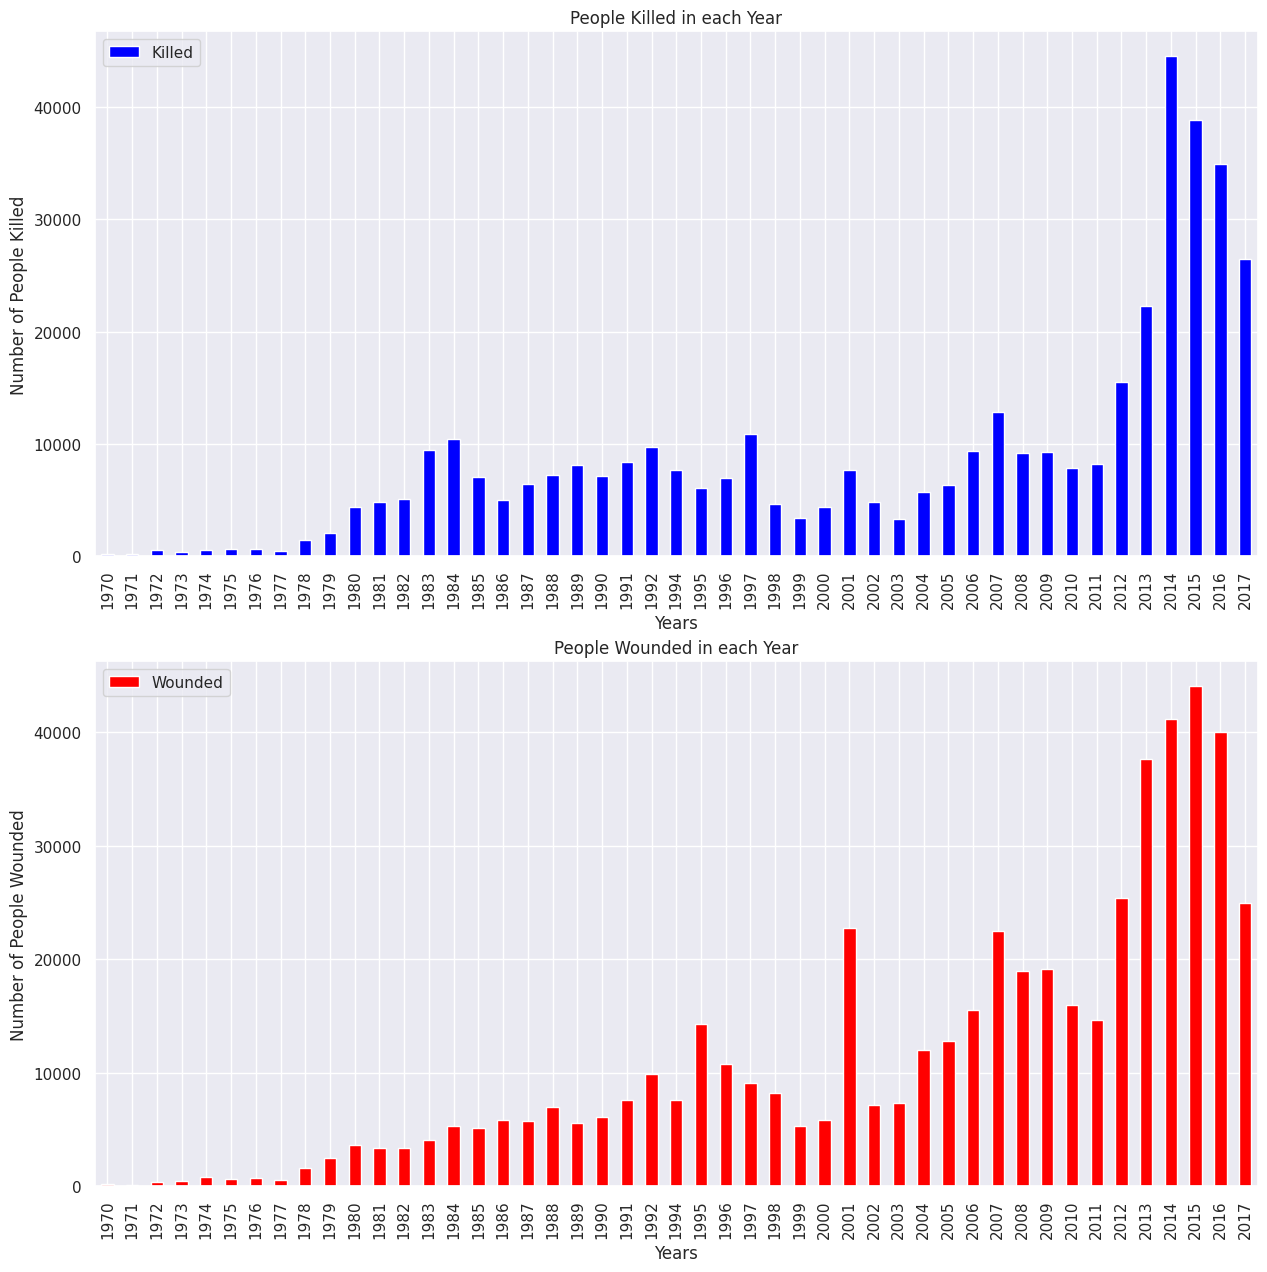

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
k.plot(kind="bar",color="blue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
w.plot(kind="bar",color="red",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

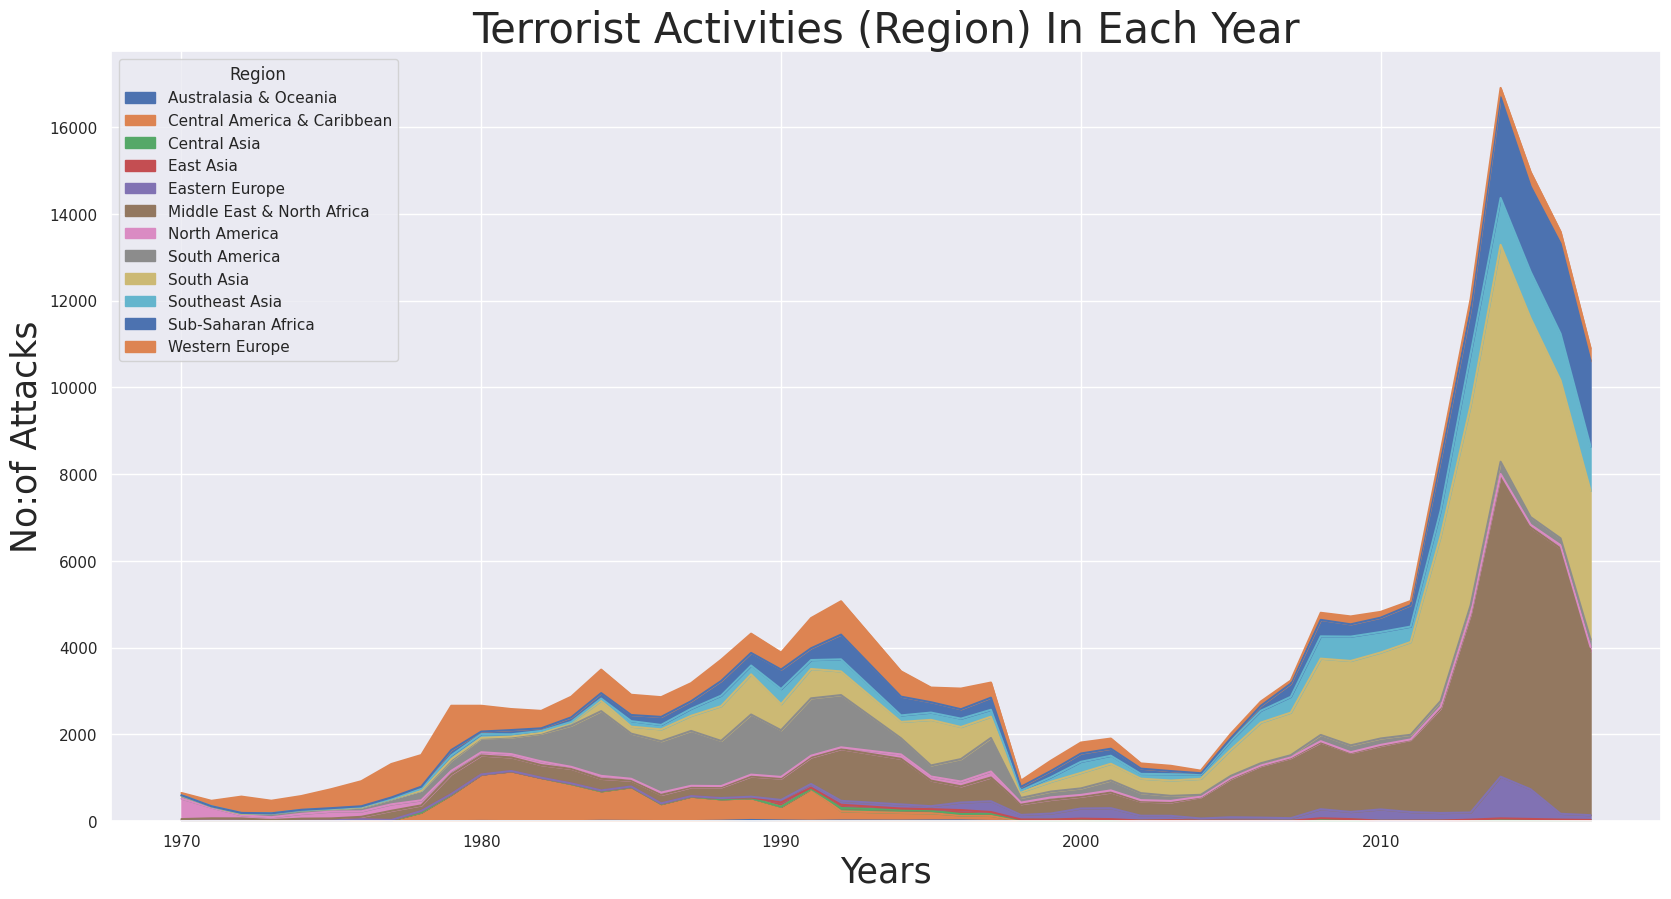

In [ ]:
pd.crosstab(df.Year, df.Region).plot(kind='area',stacked=True,figsize=(20,10))
plt.ylabel('No:of Attacks',fontsize=25)
plt.xlabel("Years",fontsize=25)
plt.title('Terrorist Activities (Region) In Each Year',fontsize=30)
plt.show()

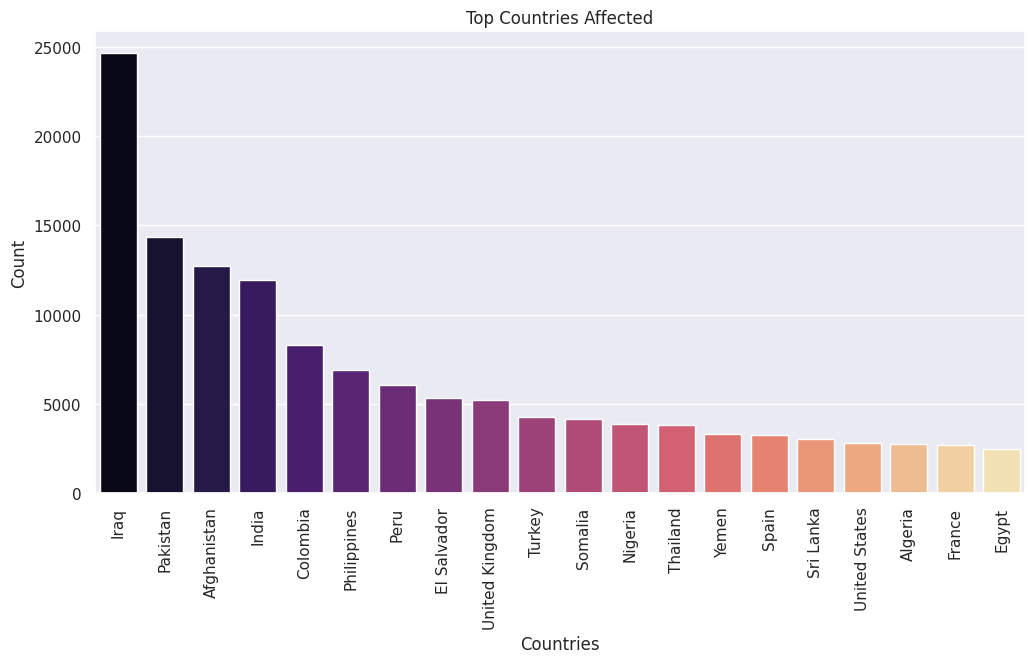

In [ ]:
# Top countries to be affected
plt.subplots(figsize=(12,6))
top=df['Country'].value_counts()[:20].to_frame().reset_index()
top.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= top, palette='magma')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import plotly.express as px

# Group the data by country and count the number of attacks
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Attack Count']

# Create the choropleth map
fig = px.choropleth(country_counts,locations='Country',locationmode='country names', color='Attack Count',
                    title='Terrorist Attacks by Country',
                    labels={'Attack Count': 'Number of Attacks'},
                    hover_name='Country',color_continuous_scale='Reds')

fig.show()

In [ ]:
attacks_by_country_region = df.groupby(['Country', 'Region']).size().reset_index(name='Total_Attacks_Count')

# Find the row with the maximum total number of attacks
max_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmax()]
min_attacks_row = attacks_by_country_region.loc[attacks_by_country_region['Total_Attacks_Count'].idxmin()]

print("Country with the maximum attacks:", max_attacks_row['Country'])
print("Region with the maximum attacks:", max_attacks_row['Region'])
print("Region with the minimum attacks:", min_attacks_row['Region'])
print("Total number of attacks in that region:", max_attacks_row['Total_Attacks_Count'])

Country with the maximum attacks: Iraq
Region with the maximum attacks: Middle East & North Africa
Region with the minimum attacks: Western Europe
Total number of attacks in that region: 24636


# Insights

#### - The Middle East & North Africa region is a significant hotspot for terrorism, with the highest number of attacks

#### - Iraq, Afghanistan, and Pakistan are among the most adversely affected nations, with the highest number of terrorist attacks

#### - May is the month with the highest number of terrorist attacks. It could be valuable to explore if there are any specific reasons or historical events associated with this peak in terrorist incidents during May

#### - Bombing and explosion attacks are the most common types of terrorist incidents. This information can be used to focus efforts on improving security measures and intelligence to prevent such attacks.

#### -Taliban can  be seen as the most active terrorist group
